In [35]:
from src.neural_networks.get_data import get_tf_data, stack_1d_features, normalize_1d_features_with_mean_std, load_cv_data
from src.neural_networks.nn_forecast import NNForecast
from src.visualization.twcrpss_plot import make_twcrpss_plot_tf
from src.visualization.brier_score import make_brier_skill_plot_tf
from src.visualization.pit import make_cpit_diagram_tf, comp_multiple_pit_scores
from src.visualization.reliability_diagram import make_reliability_and_sharpness_tf
from src.training.training import load_model


import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


In [2]:

features_names = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot']

features_names_dict = {name: 1 for name in features_names}

features_names_dict['wind_speed'] = 15

ignore = ['229', '285', '323']



In [3]:

train_data, test_data, data_info = load_cv_data(3, features_names_dict)

train_data = train_data.shuffle(len(train_data))

train_data = train_data.batch(32)

train_data = train_data.prefetch(tf.data.experimental.AUTOTUNE)


In [4]:
test_data_original = test_data



In [5]:
test_data = test_data.batch(len(test_data))

test_data = test_data.repeat()

test_data = test_data.prefetch(tf.data.experimental.AUTOTUNE)

In [55]:

filepath = '/net/pc200239/nobackup/users/hakvoort/models/conv_nn/'

crps_tn_e10 = NNForecast.my_load(filepath + 'CRPS_trunc_normal_epochs_10', train_data)

crps_tn_e10_2 = NNForecast.my_load(filepath + 'CRPS_trunc_normal_epochs_10_v2', train_data)

crps_tn_e10_3 = NNForecast.my_load(filepath + 'CRPS_trunc_normal_epochs_10_v3', train_data)

crps_tn_e10_4 = NNForecast.my_load(filepath + 'CRPS_trunc_normal_epochs_10_v4', train_data)



crps_tn_e50 = NNForecast.my_load(filepath + 'CRPS_trunc_normal_epochs_50', train_data)

hist_crps_e50 = NNForecast.load_history(filepath + 'CRPS_trunc_normal_epochs_50')

crps_tn_e50_2 = NNForecast.my_load(filepath + 'CRPS_trunc_normal_epochs_50_v2', train_data)

hist_crps_e50_2 = NNForecast.load_history(filepath + 'CRPS_trunc_normal_epochs_50_v2')

crps_tn_e50_3 = NNForecast.my_load(filepath + 'CRPS_trunc_normal_epochs_50_v3', train_data)

hist_crps_e50_3 = NNForecast.load_history(filepath + 'CRPS_trunc_normal_epochs_50_v3')

crps_tn_e50_4 = NNForecast.my_load(filepath + 'CRPS_trunc_normal_epochs_50_v4', train_data)

hist_crps_e50_4 = NNForecast.load_history(filepath + 'CRPS_trunc_normal_epochs_50_v4')



crps_tn_e30 = NNForecast.my_load(filepath + 'CRPS_trunc_normal_epochs_30', train_data)

crps_tn_e30_2 = NNForecast.my_load(filepath + 'CRPS_trunc_normal_epochs_30_v2', train_data)

crps_tn_e30_3 = NNForecast.my_load(filepath + 'CRPS_trunc_normal_epochs_30_v3', train_data)

crps_m_e20 = NNForecast.my_load(filepath + 'CRPS_mixture_epochs_20', train_data)

crps_m_e20_2 = NNForecast.my_load(filepath + 'CRPS_mixture_epochs_20_v2', train_data)

crps_m_e30 = NNForecast.my_load(filepath + 'CRPS_mixture_epochs_30', train_data)

twCRPS_M11_STD2_C20_e15 = NNForecast.my_load(filepath + 'twCRPS_mean_11_std_2_constant_0.2_trunc_normal_epochs_15', train_data)

twCRPS_M11_STD02_C05_e15 = NNForecast.my_load(filepath + 'twCRPS_mean_11_std_0.2_constant_0.5_trunc_normal_epochs_15', train_data)

twCRPS_M9_STD2_C20_e15 = NNForecast.my_load(filepath + 'twCRPS_mean_9_std_2_constant_0.2_trunc_normal_epochs_15', train_data)

twCRPS_M9_STD2_C20_e15_2 = NNForecast.my_load(filepath + 'twCRPS_mean_9_std_2_constant_0.2_trunc_normal_epochs_15_v2', train_data)

crps_tn_e15 = NNForecast.my_load(filepath + 'CRPS_trunc_normal_epochs_15', train_data)

crps_tn_e15_2 = NNForecast.my_load(filepath + 'CRPS_trunc_normal_epochs_15_v2', train_data)



twCRPS_M9_STD2_C20_e50 = NNForecast.my_load(filepath + 'twCRPS_mean_9_std_2_constant_0.2_trunc_normal_epochs_50', train_data)

hist_e50_twCRPS_M9_STD2_C20 = NNForecast.load_history(filepath + 'twCRPS_mean_9_std_2_constant_0.2_trunc_normal_epochs_50')

twCRPS_M9_STD2_C20_e50_2 = NNForecast.my_load(filepath + 'twCRPS_mean_9_std_2_constant_0.2_trunc_normal_epochs_50_v2', train_data)

hist_e50_twCRPS_M9_STD2_C20_2 = NNForecast.load_history(filepath + 'twCRPS_mean_9_std_2_constant_0.2_trunc_normal_epochs_50_v2')

twCRPS_M9_STD2_C20_e50_3 = NNForecast.my_load(filepath + 'twCRPS_mean_9_std_2_constant_0.2_trunc_normal_epochs_50_v3', train_data)

hist_e50_twCRPS_M9_STD2_C20_3 = NNForecast.load_history(filepath + 'twCRPS_mean_9_std_2_constant_0.2_trunc_normal_epochs_50_v3')

twCRPS_M9_STD2_C20_e50_4 = NNForecast.my_load(filepath + 'twCRPS_mean_9_std_2_constant_0.2_trunc_normal_epochs_50_v4', train_data)

hist_e50_twCRPS_M9_STD2_C20_4 = NNForecast.load_history(filepath + 'twCRPS_mean_9_std_2_constant_0.2_trunc_normal_epochs_50_v4')



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 910ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 890ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 876ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 888ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 875ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 857ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 853ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 857ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 852ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 851ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 858ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 926ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 936ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 934ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 853ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 845ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 865ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 853ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 854ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 845ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 843ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 907ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 871ms/step


In [56]:
hists_crps = [hist_crps_e50, hist_crps_e50_2, hist_crps_e50_3, hist_crps_e50_4]

hists_twcrps = [hist_e50_twCRPS_M9_STD2_C20, hist_e50_twCRPS_M9_STD2_C20_2, hist_e50_twCRPS_M9_STD2_C20_3, hist_e50_twCRPS_M9_STD2_C20_4]

In [38]:
nn_crps_e10_models = {'CRPS_trunc_normal_epochs_10_v1': crps_tn_e10,
                      'CRPS_trunc_normal_epochs_10_v2': crps_tn_e10_2,
                      'CRPS_trunc_normal_epochs_10_v3': crps_tn_e10_3,
                      'CRPS_trunc_normal_epochs_10_v4': crps_tn_e10_4}

nn_crps_e30_models = {'CRPS_trunc_normal_epochs_30': crps_tn_e30,
                        'CRPS_trunc_normal_epochs_30_v2': crps_tn_e30_2,
                        'CRPS_trunc_normal_epochs_30_v3': crps_tn_e30_3}

nn_crps_m_e20_models = {'CRPS_mixture_epochs_20': crps_m_e20,
                        'CRPS_mixture_epochs_20_v2': crps_m_e20_2,
                        'CRPS_mixture_epochs_30': crps_m_e30}

nn_twcrps_models = {'twCRPS_M11_STD2_C20_e15': twCRPS_M11_STD2_C20_e15,
                    'twCRPS_M11_STD02_C05_e15': twCRPS_M11_STD02_C05_e15}

nn_e15_models = {'crps_tn_e15': crps_tn_e15,
                    'crps_tn_e15_2': crps_tn_e15_2,
                    'twCRPS_M9_STD2_C20_e15': twCRPS_M9_STD2_C20_e15,
                    'twCRPS_M9_STD2_C20_e15_2': twCRPS_M9_STD2_C20_e15_2}

In [39]:
filepath = '/net/pc200239/nobackup/users/hakvoort/models/emos/batching/'

emos_base = load_model(filepath + 'crps_batch_none_epochs_600')

emos_batch_32_epochs_50 = load_model(filepath + 'crps_batch_32_epochs_50')

emos_batch_32_epochs_150 = load_model(filepath + 'crps_batch_32_epochs_150')

test_file_path = '/net/pc200239/nobackup/users/hakvoort/models/emos/pit_loss/test'

emos_pit_loss = load_model(test_file_path)

Using given parameters for Truncated Normal distribution
Using given parameters for Truncated Normal distribution
Using given parameters for Truncated Normal distribution
Using given parameters for Truncated Normal distribution


In [18]:
pit_loss_dict = {'emos_pit_loss': emos_pit_loss}

In [19]:
for model_name, model in nn_crps_e10_models.items():
    print("CRPS for model: ", model_name, ' is: ', model.CRPS(test_data, 10000).numpy())

for model_name, model in nn_crps_e10_models.items():
    print("twCRPS12 for model: ", model_name, ' is: ', model.twCRPS(test_data, [12], 10000)[0].numpy())

244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
CRPS for model:  CRPS_trunc_normal_epochs_10  is:  0.83724797
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
CRPS for model:  CRPS_trunc_normal_epochs_10_v2  is:  0.84511626
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
CRPS for model:  CRPS_trunc_normal_epochs_10_v3  is:  0.85348797
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
CRPS for model:  CRPS_trunc_normal_epochs_10_v4  is:  0.8306905
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
twCRPS12 for model:  CRPS_trunc_normal_epochs_10  is:  0.06104973
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
twCRPS12 for model:  CRPS_trunc_normal_epochs_10_v2  is:  0.061157875
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
twCRPS12 for model:  CRPS_trunc_normal_epochs_10_v3  is:  0.0605233
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
twCRPS12 for model:  CRPS_trunc_normal_epochs_10_v4  is:  0.0593243


## Work of the past 4 weeks

- Implemented (convolutional) neural networks, which can be trained on the CRPS/twCRPS and with different parametric distributions.

- Implemented the PIT scores

- For EMOS with linear regression, added the option to train on PIT scores (to get a better understanding of the behavior)

- Looked into different ways of hyperparameter optimization.

## Convolutional neural networks

In the following plots we can see CNNs, where I fixed the network architecture for all models, except for the number of epochs, the distribution and the loss function. As reference model the EMOS with linear regression with CRPS and truncated normal is chosen.

Currently use random initialization, and since overfitting is a problem (even when incorporating $l_2$ regression) we use early stopping. This leads to varied results over different runs. Following plots contain 4 different models with the exact same settings.

244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


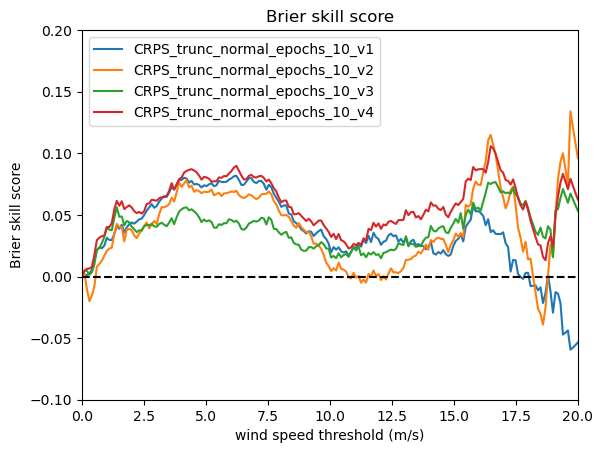

In [27]:
values = np.linspace(0, 20, 200)
ylim = [-0.1, 0.2]
make_brier_skill_plot_tf(emos_base, nn_crps_e10_models, test_data, values, ylim=ylim)

244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


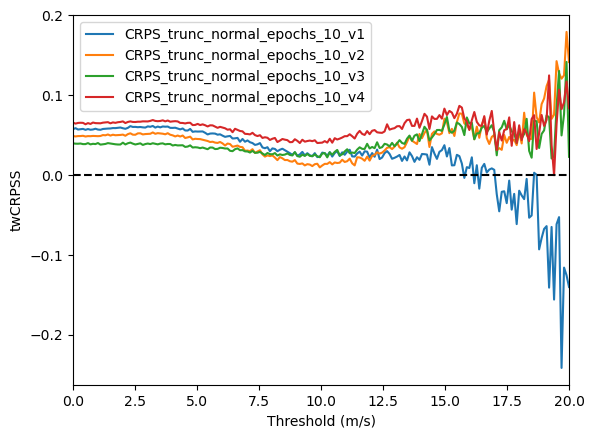

In [28]:
make_twcrpss_plot_tf(emos_base, nn_crps_e10_models, test_data, values)

244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


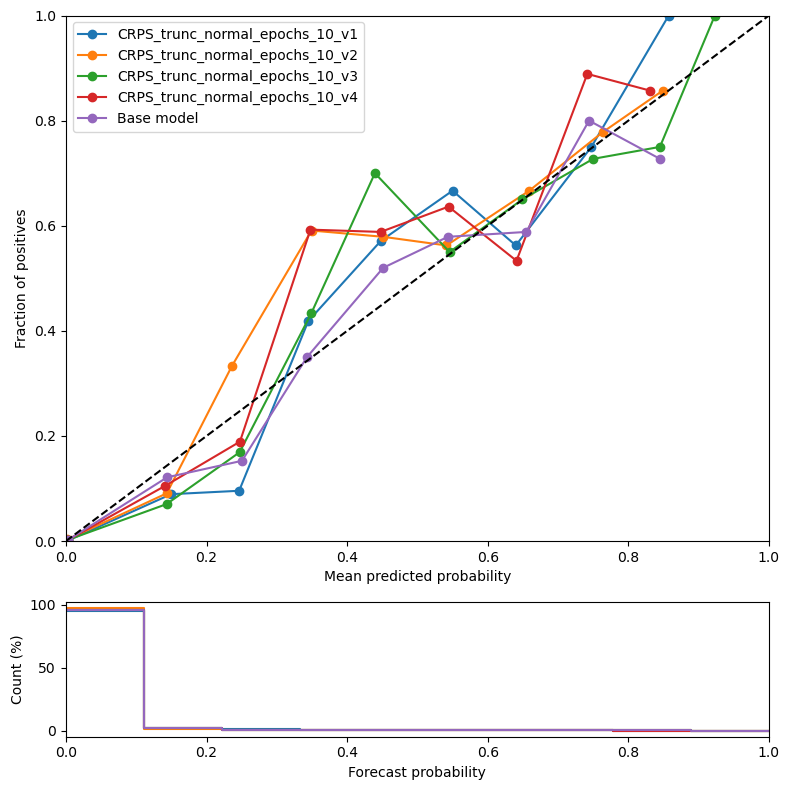

In [30]:
t = 15
make_reliability_and_sharpness_tf(nn_crps_e10_models, test_data, t=t, base_model=emos_base)

By looking at the twCRPSS and BSS plots, we can see that v4 is the 'best' model. This is unfortanetely not reflected in the cPIT diagram for high thresholds, then model v2 has the best performance.

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
There are 848 values in the PIT diagram


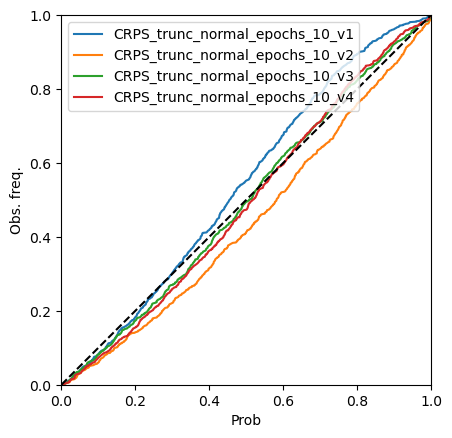

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
The pit score for model CRPS_trunc_normal_epochs_10_v1 is: 0.04453717917203903
The pit score for model CRPS_trunc_normal_epochs_10_v2 is: 0.056648969650268555
The pit score for model CRPS_trunc_normal_epochs_10_v3 is: 0.01818939484655857
The pit score for model CRPS_trunc_normal_epochs_10_v4 is: 0.02609872631728649
The pit score for model base_model is: 0.02159336768090725


In [34]:
t = 10
make_cpit_diagram_tf(nn_crps_e10_models, test_data_original, t=t)#, base_model=emos_base)
pits_scores = comp_multiple_pit_scores(nn_crps_e10_models, test_data_original, t=t, base_model=emos_base)

for key, value in pits_scores.items():
    print("The pit score for model {} is: {}".format(key, value))

In the following plot I trained on on the twCRPS function. For higher mean and smaller std the results got worse, both for CRPS and twCRPS with high threshold.

244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


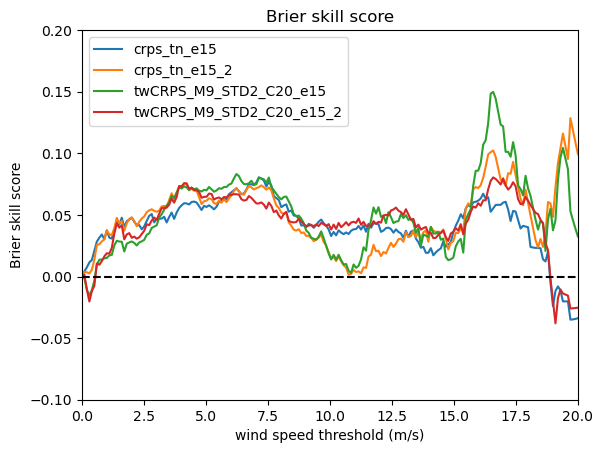

In [21]:
make_brier_skill_plot_tf(emos_base, nn_e15_models, test_data, values, ylim=ylim)

In this BSS plot I trained using a mixture distribution of TN-LN. The results were not better compared to only using TN. I increased the number of epochs during training, since convergence was slower with mixture distributions.

244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step


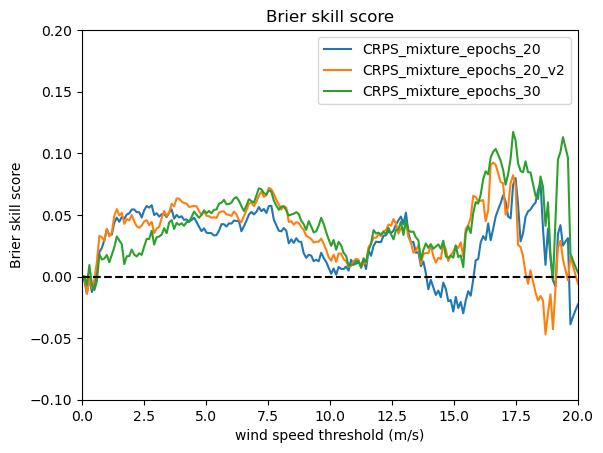

In [17]:
make_brier_skill_plot_tf(emos_base, nn_crps_m_e20_models, test_data, values, ylim=ylim)

And here a BSS plot with twCRPS with different constants.

244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


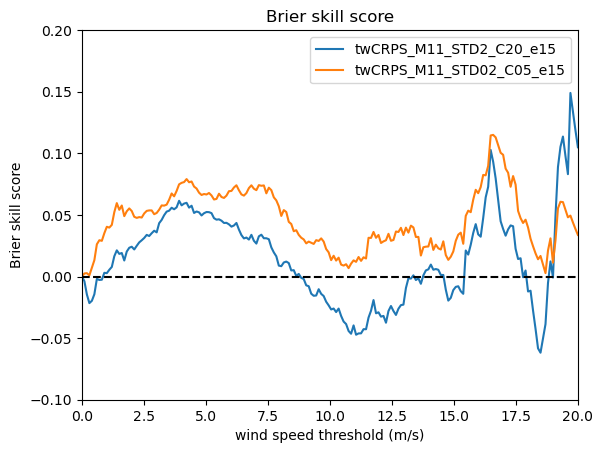

In [24]:
make_brier_skill_plot_tf(emos_base, nn_twcrps_models, test_data, values, ylim=ylim)

In the following plots I compared the validation and training error for the models trained on the CRPS and twCRPS, with mean 9, std 2 and c 0.2. It seems like when training on the twCRPS, the convergence is slightly slower.

/tmp/ipykernel_3993905/908924547.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('Blues')
/tmp/ipykernel_3993905/908924547.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('Reds')


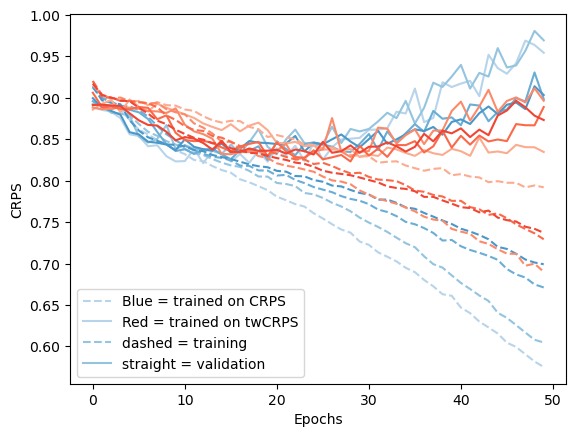

In [57]:
color_map = cm.get_cmap('Blues')
num_hists = len(hists_crps)

x_axis = np.arange(50)

for i, hist in enumerate(hists_crps):
    color = color_map(0.3 + i / num_hists * 0.4)  # Get a color from the color map.
    plt.plot(x_axis, hist['_loss_crps_sample'], label='CRPS_train', linestyle='--', color=color)
    plt.plot(x_axis, hist['val__loss_crps_sample'], label='CRPS_val', color=color)

color_map = cm.get_cmap('Reds')
num_hists = len(hists_twcrps)

for i, hist in enumerate(hists_twcrps):
    color = color_map(0.3 + i / num_hists * 0.4)  # Get a color from the color map.
    plt.plot(x_axis, hist['_loss_crps_sample'], label='CRPS_train', linestyle='--', color=color)
    plt.plot(x_axis, hist['val__loss_crps_sample'], label='CRPS_val', color=color)

plt.xlabel('Epochs')
plt.ylabel('CRPS')
plt.legend(['Blue = trained on CRPS', 'Red = trained on twCRPS', 'dashed = training', 'straight = validation'])
plt.show()

/tmp/ipykernel_3993905/2742878185.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('Blues')
/tmp/ipykernel_3993905/2742878185.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('Reds')


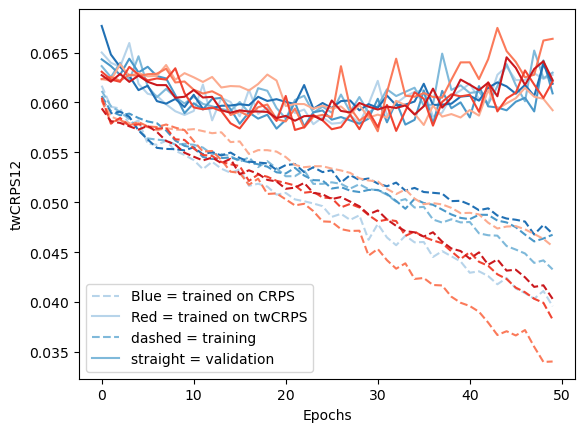

In [58]:
color_map = cm.get_cmap('Blues')
num_hists = len(hists_crps)

x_axis = np.arange(50)

for i, hist in enumerate(hists_crps):
    color = color_map(0.3 + i / num_hists * 0.6)  # Get a color from the color map.
    plt.plot(x_axis, hist['_tw_crps_12'], label='CRPS_train', linestyle='--', color=color)
    plt.plot(x_axis, hist['val__tw_crps_12'], label='CRPS_val', color=color)

color_map = cm.get_cmap('Reds')
num_hists = len(hists_twcrps)

for i, hist in enumerate(hists_twcrps):
    color = color_map(0.3 + i / num_hists * 0.6)  # Get a color from the color map.
    plt.plot(x_axis, hist['_tw_crps_12'], label='CRPS_train', linestyle='--', color=color)
    plt.plot(x_axis, hist['val__tw_crps_12'], label='CRPS_val', color=color)

plt.xlabel('Epochs')
plt.ylabel('twCRPS12')
plt.legend(['Blue = trained on CRPS', 'Red = trained on twCRPS', 'dashed = training', 'straight = validation'])
plt.show()

## Training on cPIT Scores

## Hyperparameter Optimization